In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing as ps
import statsmodels.api as sm

In [116]:
ct = pd.read_csv('Company_Turnover.csv')
ct.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [117]:
ct.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [118]:
corr = ct.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [119]:
ct['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

G:\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


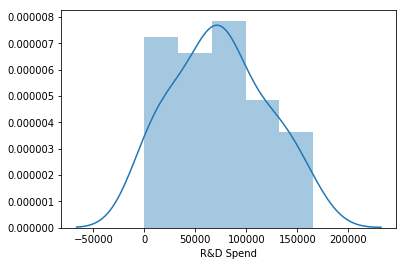

In [120]:
sns.distplot(ct['R&D Spend'])

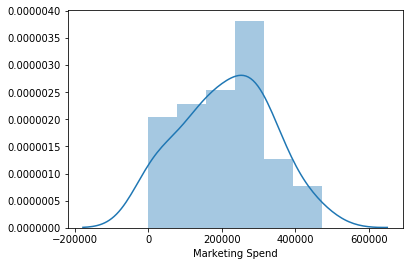

In [121]:
sns.distplot(ct['Marketing Spend'])

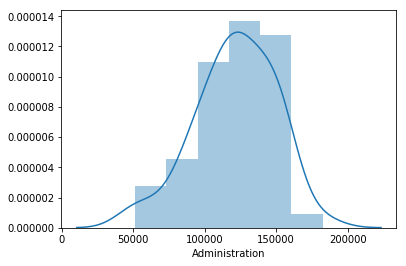

In [122]:
sns.distplot(ct['Administration'])

In [123]:
ct['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

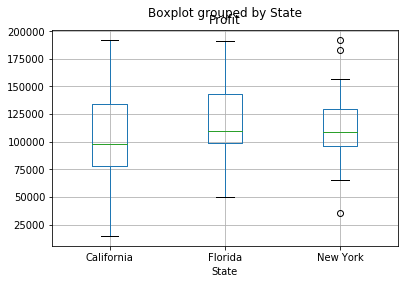

In [124]:
ct.boxplot(column = 'Profit' , by = 'State')

In [125]:
ct.pivot_table(ct,index=["State"])

,Administration,Marketing Spend,Profit,R&D Spend
State,,,,
California,120746.507059,182540.929412,103905.175294,64657.674118
Florida,121768.897500,247323.551250,118774.024375,80724.016250
New York,121543.470588,205346.015882,113756.446471,76195.062353


In [126]:
c = ct['Profit']
c

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

Text(0.5, 1.0, 'R&D vs Profit')

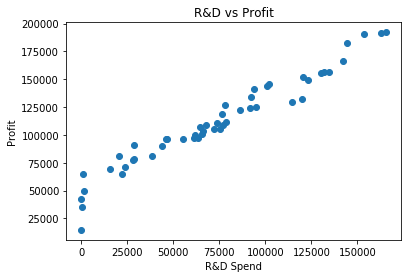

In [127]:
plt.plot(ct['R&D Spend'] , ct['Profit'],'o')
plt.xlabel('R&D Spend' )
plt.ylabel('Profit')
plt.title("R&D vs Profit")

In [128]:
profit_mean = ct['Profit'].mean()
profit_mean

112012.63920000002

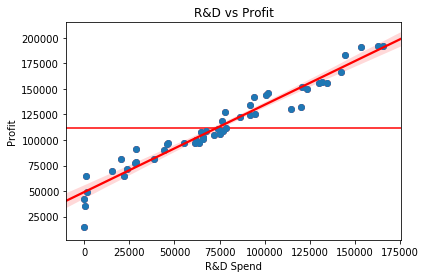

In [82]:
plt.axhline(profit_mean ,linestyle = '-' , color = 'r')
plt.plot(ct['R&D Spend'] , ct['Profit'],'o')
plt.xlabel('R&D Spend' )
plt.ylabel('Profit')
plt.title("R&D vs Profit")
sns.regplot(x = 'R&D Spend' , y = 'Profit' , data = ct , color = 'r')

In [129]:
X= ct['R&D Spend']
X.values

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [130]:
y=ct['Profit']
y.values

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [131]:
import statsmodels.api as st

In [132]:
ols = st.OLS( y , X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     878.4
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           6.00e-33
Time:                        10:01:17   Log-Likelihood:                -581.74
No. Observations:                  50   AIC:                             1165.
Df Residuals:                      49   BIC:                             1167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R&D Spend      1.3363      0.045     29.637      0.000       1.246       1.427
==============================================================================
Omnibus:                        1.920   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.246
Skew:                          -0.044   Prob(JB):                        0.536
Kurtosis:                       2.232   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# R&D vs Profit

In [133]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

In [134]:
X_train

32     63408.86
39     38558.51
21     78389.47
36     28663.76
19     86419.70
42     23640.93
49         0.00
26     75328.87
22     73994.56
13     91992.39
41     27892.92
17     94657.16
45      1000.23
24     77044.01
23     67532.53
4     142107.34
33     55493.95
14    119943.24
30     61994.48
10    101913.08
28     66051.52
44     22177.74
34     46426.07
18     91749.16
20     76253.86
25     64664.71
6     134615.46
7     130298.13
47         0.00
1     162597.70
16     78013.11
0     165349.20
15    114523.61
5     131876.90
11    100671.96
9     123334.88
8     120542.52
12     93863.75
43     15505.73
37     44069.95
Name: R&D Spend, dtype: float64

In [135]:
X_train = X_train.values.reshape(-1,1)
X_train

array([[ 63408.86],
       [ 38558.51],
       [ 78389.47],
       [ 28663.76],
       [ 86419.7 ],
       [ 23640.93],
       [     0.  ],
       [ 75328.87],
       [ 73994.56],
       [ 91992.39],
       [ 27892.92],
       [ 94657.16],
       [  1000.23],
       [ 77044.01],
       [ 67532.53],
       [142107.34],
       [ 55493.95],
       [119943.24],
       [ 61994.48],
       [101913.08],
       [ 66051.52],
       [ 22177.74],
       [ 46426.07],
       [ 91749.16],
       [ 76253.86],
       [ 64664.71],
       [134615.46],
       [130298.13],
       [     0.  ],
       [162597.7 ],
       [ 78013.11],
       [165349.2 ],
       [114523.61],
       [131876.9 ],
       [100671.96],
       [123334.88],
       [120542.52],
       [ 93863.75],
       [ 15505.73],
       [ 44069.95]])

In [136]:
y_train

32     97427.84
39     81005.76
21    111313.02
36     90708.19
19    122776.86
42     71498.49
49     14681.40
26    105733.54
22    110352.25
13    134307.35
41     77798.83
17    125370.37
45     64926.08
24    108552.04
23    108733.99
4     166187.94
33     96778.92
14    132602.65
30     99937.59
10    146121.95
28    103282.38
44     65200.33
34     96712.80
18    124266.90
20    118474.03
25    107404.34
6     156122.51
7     155752.60
47     42559.73
1     191792.06
16    126992.93
0     192261.83
15    129917.04
5     156991.12
11    144259.40
9     149759.96
8     152211.77
12    141585.52
43     69758.98
37     89949.14
Name: Profit, dtype: float64

In [137]:
from sklearn import linear_model as lm
lr = lm.LinearRegression()
model = lr.fit(X_train,y_train)

In [138]:
print("Accuracy is :%.2f"%(lr.score(X_train,y_train)*100))

Accuracy is :93.85


In [171]:
print("Accuracy of test is :%.2f"%(lr.score(X_test , y_test)*100))

Accuracy of test is :39.06


In [139]:
Xn = [[44069.95]]
y_pred = model.predict(Xn)

In [140]:
print("%.2f"%y_pred)

86798.29


In [141]:
print("Slope is :",model.coef_)
print("Coefficient :" , model.intercept_)

Slope is : [0.83483889]
Coefficient : 50006.98605287172


In [142]:
X_test = X_test.values.reshape(-1,1)

In [143]:
predictions = model.predict(X_test)
predictions

array([110205.21485085,  88421.2794682 ,  74012.21901407,  66895.43452861,
       178105.92605486, 170534.68867084,  50459.5104736 , 104776.99220259,
        51105.18322009, 101046.01371598])

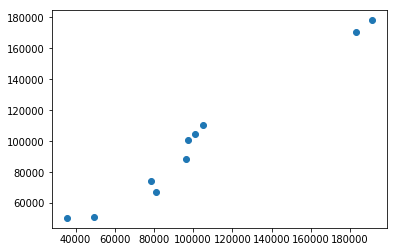

In [144]:
plt.scatter(y_test,predictions)

In [145]:
X_train = X_train.reshape(-1,1)
train_prediction = model.predict(X_train)

In [146]:
from sklearn.metrics import mean_squared_error , r2_score
rmse_training = (np.sqrt(mean_squared_error(y_train, train_prediction)))
r2_training = r2_score(y_train, train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, predictions)))
r2_testing = r2_score(y_test, predictions)
print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

The model performance for training set
--------------------------------------
RMSE is 9248.996993223018
R2 score is 0.9384876517801736


The model performance for testing set
--------------------------------------
Root mean squared error:  9401.78311815635
R2 score:  0.9610399086371776


In [147]:
X = X.values.reshape(-1,1)
y_pred = model.predict(X)

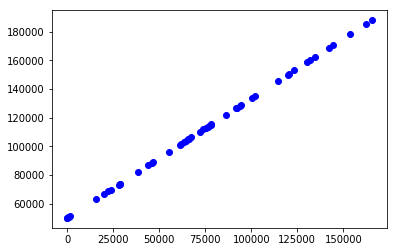

In [148]:
plt.scatter(X, y_pred, color='b')
plt.show()

# Administration vs Profit

In [149]:
X= ct['Administration']

In [150]:
X_train , X_test ,y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 1)

In [151]:
X_train = X_train.values.reshape(-1,1)

In [152]:
from sklearn import linear_model as lm
lr  = lm.LinearRegression()
model = lr.fit(X_train , y_train)

In [153]:
print("Accuracy:" ,(lr.score(X_train,y_train)*100))

Accuracy: 1.993547316276234


In [154]:
m = sm.OLS(y_train , X_train).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     296.5
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           8.00e-20
Time:                        10:01:53   Log-Likelihood:                -481.68
No. Observations:                  40   AIC:                             965.4
Df Residuals:                      39   BIC:                             967.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8915      0.052     17.220      0.000       0.787       0.996
==============================================================================
Omnibus:                        0.558   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.588
Skew:                          -0.256   Prob(JB):                        0.745
Kurtosis:                       2.699   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
X_test = X_test.values.reshape(-1,1)

In [156]:
y_train_pred = model.predict(X_train)

In [157]:
y_test_pred = model.predict(X_test)

In [172]:
rmse_training = (np.sqrt(mean_squared_error(y_train, train_prediction)))
r2_training = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2_testing = r2_score(y_test, predictions)
print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

The model performance for training set
--------------------------------------
RMSE is 9248.996993223018
R2 score is 0.6090815534933034


The model performance for testing set
--------------------------------------
Root mean squared error:  37184.64191397339
R2 score:  0.9610399086371776


# Marketing Spend Vs profit

In [173]:
X = ct['Marketing Spend']

In [160]:
X_train , X_test ,y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

In [161]:
X_train = X_train.values.reshape(-1,1)

In [162]:
model = lr.fit(X_train,y_train)

In [163]:
print("Accuracy :" , model.score(X_train , y_train))

Accuracy : 0.6090815534933034


In [164]:
m = sm.OLS(y_train , X_train).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     332.0
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           1.12e-20
Time:                        10:02:07   Log-Likelihood:                -479.67
No. Observations:                  40   AIC:                             961.3
Df Residuals:                      39   BIC:                             963.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4745      0.026     18.221      0.000       0.422       0.527
==============================================================================
Omnibus:                        6.973   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                5.847
Skew:                           0.902   Prob(JB):                       0.0537
Kurtosis:                       3.501   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
X_test = X_test.values.reshape(-1,1)

In [166]:
y_train_pred = model.predict(X_train)

In [167]:
y_test_pred = model.predict(X_test)

In [169]:
rmse_training = (np.sqrt(mean_squared_error(y_train, train_prediction)))
r2_training = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2_testing = r2_score(y_test, predictions)
print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

The model performance for training set
--------------------------------------
RMSE is 9248.996993223018
R2 score is 0.6090815534933034


The model performance for testing set
--------------------------------------
Root mean squared error:  37184.64191397339
R2 score:  0.9610399086371776
